In [1]:
import json
import os
from os import listdir
from os.path import isfile, join
import pickle
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import tabulate
import numpy as np
import math

import re

from itertools import cycle, islice

# Fitting Linear Regression to the dataset 
from sklearn.linear_model import LinearRegression 
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 

from scipy.stats import pearsonr

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [2]:
fig_width = 8
fig_height = 5

params = {
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 12,
    #'text.fontsize': 8, # was 10
    'legend.fontsize': 12, # was 10
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': True,
    'text.usetex': False,
    'figure.figsize': [fig_width,fig_height],
    'font.family': 'serif',
    'grid.linestyle': '--',
    'lines.linewidth': 2
}

matplotlib.rcParams.update(params)

In [3]:
data_dir = join('..', 'data', 'dataset_data')
out_dir = join('..', 'plots', 'statistical_analysis')

In [4]:
def build_degree_frame(data_size_dir):

    curr_dir = join(data_dir, data_size_dir)
    onlyfiles = [f for f in listdir(curr_dir) if isfile(join(curr_dir, f)) and f.endswith(".csv")]
    onlyfiles.sort(key=natural_keys)

    degree_frame = pd.DataFrame()
    i = 0
    for filename in onlyfiles:
        with open(os.path.join(curr_dir, filename), 'r') as f:
            df = pd.read_csv(f, sep=',')
            if 'iteration' in filename:
                iteration = filename.replace('iteration', '')
                iteration = iteration.replace('-', '')
                iteration = iteration.replace('degree.csv', '')
                iteration = iteration.replace('.gz', '')
                iteration = iteration.replace('.nq', '')
                iteration = iteration.replace('.nt', '')
                i = int(iteration)
            else:
                i = i + 1

            df['Iteration'] = i
            df = df.set_index('Iteration')
            if degree_frame.empty:
                degree_frame = df
            else:
                degree_frame = degree_frame.append(df)

    #plot = degree_frame['max_degree'].plot()  
    if data_size_dir == 'DyLDO-core':
        degree_frame = degree_frame.drop(degree_frame.index[[21,22]])


    if data_size_dir == 'DyLDO-ext':
        degree_frame = degree_frame.head()
        iterations = 5
        ticks = 1.0
        print('drop the beat')
        
    return degree_frame
    


In [12]:
def plot_degrees(data_size_dir, y_min=None, y_max=None):
    degree_frame = build_degree_frame(data_size_dir)
    plot_frame = degree_frame[['avg_degree', 'avg_indegree', 'avg_outdegree']]

    plot_frame.columns = ['degree', 'in-degree', 'out-degree']

    fig, ax_new = plt.subplots(1,1, sharey=False)

    boxplot = plot_frame.boxplot() 

    if y_min is not None and y_max is not None:
        ax_new.set_ylim(y_min, y_max)
    else:
        print(y_min, y_max)


    plt.savefig(out_dir + '/' + data_size_dir + '-degree.pdf', bbox_inches = 'tight')
    plt.savefig(out_dir + '/' + data_size_dir + '-degree.png', bbox_inches = 'tight')






In [13]:

"""
data_size_dir = 'LUBM'


data_size_dir = 'BSBM'


data_size_dir = 'DyLDO-core'


data_size_dir = 'DyLDO-ext'
"""


"\ndata_size_dir = 'LUBM'\n\n\ndata_size_dir = 'BSBM'\n\n\ndata_size_dir = 'DyLDO-core'\n\n\ndata_size_dir = 'DyLDO-ext'\n"

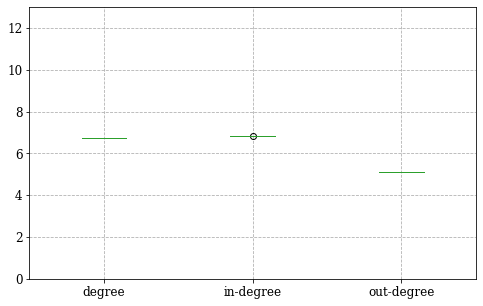

In [19]:
plot_degrees('LUBM', y_min=0, y_max=13)

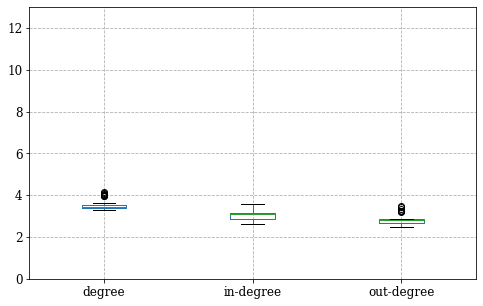

In [20]:
plot_degrees('DyLDO-core', y_min=0, y_max=13)

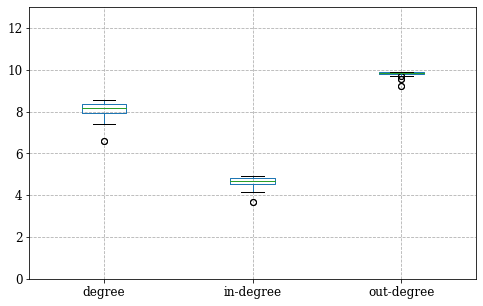

In [21]:
plot_degrees('BSBM', y_min=0, y_max=13)

drop the beat


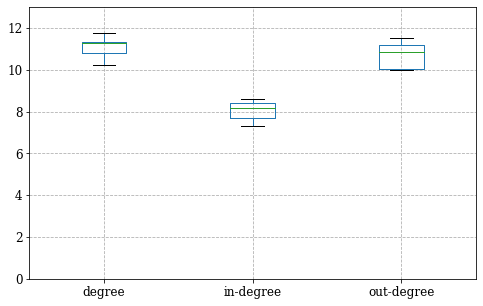

In [22]:
plot_degrees('DyLDO-ext', y_min=0, y_max=13)